In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#### Esercizi svolti da Stefano Polo

#### Matricola: 940175

#### Informazione sulla cartella contenente codici e risultati:
La struttura della cartella così come è presentata è funzionale per una compilazione semplice del *notebook*. Infatti tutti i risultati delle simulazioni sono disposti nella cartella <span style="color:red"> Risultati </span> catalogati in base al metodo adottato per il campionamento: Metropolis e Gibbs. Di conseguenza al fine della compilazione del *notebook* non è necessario rieseguire le simulazioni. Nella cartella <span style="color:red">Codici</span> sono catalogati tutti i codici C++ delle simulazioni di ciascun esercizio per il campionamento mediante Metropolis e Gibbs. La compilazione e l'esecuzione di quest'ultimi prevede l'automatica sovrascrittura dei file contenenti i risultati su quelli vecchi contenuti nella cartella <span style="color:red"> Risultati</span> (dunque un'esecuzione dei codici non richiede che i nuovi risultati vengano copiati a mano in <span style="color:red"> Risultati</span>). Per compilare e eseguire i codici è consigliabile eseguire il comando da terminale <span style="color:green">make esegui</span> (poiché automaticamente vengono eliminati i vecchi risultati con lo script "clean.sh"). 
Se invece si volesse compilare tutte e tre le simulazioni (relative a fase solida, liquida e gassosa) è disponibile nella cartella <span style="color:red">Codici</span> uno "script.sh" che esegue tutto in automatico

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


### Exercise 06.1

#### Introduzione all'esercizio
In questo esercizio si analizza un modello di Ising 1D che si compone di un sistema di $N$ spin $\{ s_i \}_{i=1,N}$ (con i valori $\{-1;1\}$) interagenti tra primi vicini con condizioni periodiche al contorno ($s_{N+1} = s_{1}$). L'Hamiltoniana del sistema (assumendo $\mu_B=1$ e $k_B=1$) è data dall'espressione:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) \, , 
$$

dove $J>0$ (modello ferromagnetico) e $h$ campo magnetico esterno.

Questo modello è stato risolto analiticamente. Dunque, lo scopo dell'esercizio è quello di simulare questo modello di Ising 1D campionando il peso di Boltzmann $p(\{ s_i \}) = \exp(-\beta H)/Z$ (Z è la funzione di partizione) con due algoritmi differenti:
- Metropolis;
- Gibbs.

Nel corso della simulazione verranno calcolate le seguenti grandezze per l'intervallo di temperatura $T\in\left[0.5;2.0\right]$ da confrontare con le curve analitiche:
1. Energia interna: $U(N,T) = \langle H \rangle_{h=0}$
2. Capacità termica: $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. Suscettività: $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. Magnetizzazione: $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$


#### Cenni sulla simulazione
Il sistema di partenza delle mie (sia per Metropolis sia per Gibbs) simulazioni consiste in $N$ spin che vengono inizializzati ciascuno casualmente con probabilità $P(s_i = -1 )=P(s_i = 1 )=0.5$. Dunque la situazione di partenza consiste in un modello di Ising 1D a temperatura infinita; dal momento che il sistema rimane disordinato fino al raggiungimento di $T=0$, questo stato rende particolarmente rapida l'equilibrazione del sistema. L'equilibrazione del sistema nelle simulazioni è avvenuta con un numero di passi $N_{eq} = 10^3$.

Terminata la fase di equilibrazione, il sistema viene lasciato evolvere per $T\in\left[0.5;2.0\right]$ con incremento $\Delta T =0.05$, adottando un numero di passi degli algoritmi di campionamento $M = 10^5$.

Durante la simulazione con il Metropolis, si osserva che al decrescere della temperatura la probabilità di accettazione di un nuovo stato di spin $s_i$ decresce fino a $P(s_i) \approx 0.02$ a $T=0.5$.

Per il calcolo di $U(N,T)$, $C(N,T)$ e $\chi(N,T)$ è stato fissato $h = 0$, mentre per $M(N,T)$ è stata fatta ripartire la simulazione (con annessa fase di equilibrazione), impostando $h = 0.02$. La stima del loro valor medio e errore è stata eseguita con il metodo del *data blocking* con un numero di blocchi $N_{block} = 20$. 

Nelle due celle sottostanti vengono inizializzate e calcolate le variabili per tracciare le curve analitiche di energia interna, capacità termica, suscettività e magnetizzazione.

In [7]:
points=100
kb=8.62e-5
T = np.linspace(0.5,2,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

In [8]:
#Calcolo Magnetizzazione Teorica
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

#### Risultati
Di seguito allego i grafici in funzione della temperatura, in cui sono presentati i risultati dei valori medi (con errore) dell'energia intena, capacità termica, suscettività e magnetizzaione ottenti dal campionamento delle configurazioni di spin $\{ s_i \}$ (sia con il Metropolis sia col Gibbs). Tali valori sono posti a confronto con i risultati analitici del modello di Ising 1D presentato precedentemente. Si osserva come i risultati delle simulazioni con entrambi gli algoritmi di campionamento siano compatibili (entro l'errore) con i valori esatti.

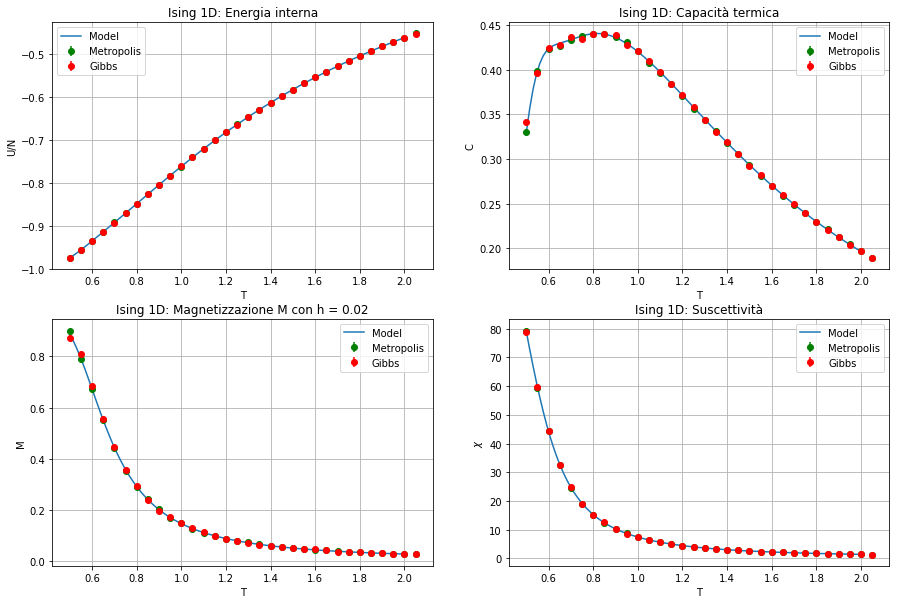

In [11]:
plt.figure(figsize=(15,10))

#ENERGIA INTERNA
plt.subplot(2,2,1)
#Simulazione con Metropolis
N, r, error = np.loadtxt('Risultati/Metropolis/ene.result.0', usecols=(0,1,2),unpack='true')
plt.errorbar(N,r,yerr=error,color ='green',label = 'Metropolis', fmt='o')
plt.grid(True)
#Simulazione con Gibbs
N, r, error = np.loadtxt('Risultati/Gibbs/ene.result.0', usecols=(0,1,2), unpack='true')
plt.errorbar(N,r,yerr=error,color ='red',label = 'Gibbs',fmt='o')
#curva Teorica
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e,label="Model")
plt.title('Ising 1D: Energia interna')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()

#CAPACITA TERMICA
plt.subplot(2,2,2)
#Simulazione con Metropolis
N, r, error = np.loadtxt('Risultati/Metropolis/heat.result.0', usecols=(0,1,2),unpack='true')
plt.errorbar(N,r,yerr=error,color ='green',label = 'Metropolis', fmt='o')
plt.grid(True)
#Simulazione con Gibbs
N, r, error = np.loadtxt('Risultati/Gibbs/heat.result.0', usecols=(0,1,2), unpack='true')
plt.errorbar(N,r,yerr=error,color ='red',label = 'Gibbs',fmt='o')
#Curva teorica
heat=(((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2))
plt.plot(T, heat,label='Model')
plt.title('Ising 1D: Capacità termica')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()

#MAGNETIZZAZIONE CAMPO 0.02
plt.subplot(2,2,3)
#Simulazione con Metropolis
N, r, error = np.loadtxt('Risultati/Metropolis/mag.result.0', usecols=(0,1,2),unpack='true')
plt.errorbar(N,r,yerr=error,color ='green',label = 'Metropolis', fmt='o')
plt.grid(True)
#Simulazione con Gibbs
N, r, error = np.loadtxt('Risultati/Gibbs/mag.result.0', usecols=(0,1,2), unpack='true')
plt.errorbar(N,r,yerr=error,color ='red',label = 'Gibbs',fmt='o')
#Curva Teorica
plt.plot(T, M,label='Model')
plt.title('Ising 1D: Magnetizzazione M con h = 0.02')
plt.xlabel('T')
plt.ylabel('M')
plt.legend()


#SUSCETTIVITA 
plt.subplot(2,2,4)
#Simulazione con Metropolis
N, r, error = np.loadtxt('Risultati/Metropolis/chi.result.0', usecols=(0,1,2),unpack='true')
plt.errorbar(N,r,yerr=error,color ='green',label = 'Metropolis', fmt='o')
plt.grid(True)
#Simulazione con Gibbs
N, r, error = np.loadtxt('Risultati/Gibbs/chi.result.0', usecols=(0,1,2), unpack='true')
plt.errorbar(N,r,yerr=error,color ='red',label = 'Gibbs',fmt='o')
#Curva teorica
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X,label='Model')
plt.title('Ising 1D: Suscettività')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()

plt.show()